### 과제(금)
서포트 벡터 머신_분류

유방암 결과를 분류하는 서포트 벡터 머신 모델을 만들고 predict method를 이용하여 목표변수 범주를 예측하라. 그리고 모델의 정확도와 confusion matrix를 구하라.

In [46]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

matplotlib.rc('font', family = 'Malgun Gothic')

먼저 데이터를 호출한 후, 데이터의 유형과 결측치를 확인한다.
확인 결과, 목표변수인 diagnosis를 제외한 나머지 컬럼은 모두 실수형 변수이다.  
결측치는 존재하지 않는다.

In [56]:
df = pd.read_csv('유방암.csv', encoding='euc-kr')
display(df.head(), df.info(), df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


None

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

목표변수와 설명변수를 구분하고, 모델 생성을 위한 train 데이터와 test 데이터를 분할하였다.  
이후, 서포트 벡터 머신 모델을 하이퍼 파라미터 조정을 하지 않은 상태에서 모델 성능을 확인하였다.  
모델 정확도는 train 88%, test 89.6%로 test 데이터에 더 높은 성능을 보이고 있다.

In [58]:
df_y = df['diagnosis']
df_x = df.drop('diagnosis', axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)

svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(df_train_x, df_train_y)
print('{:.3f}'.format(svm_uncustomized.score(df_train_x, df_train_y)))
print('{:.3f}'.format(svm_uncustomized.score(df_test_x, df_test_y)))

0.884
0.896


모델 Parameter 조정  
먼저 C(Cost)에 따른 모델 성능을 확인하였다.  
C가 1일 때, train, test 성능이 모두 높아지는 것을 알 수 있다.  
따라서, C 값은 1로 설정한다.

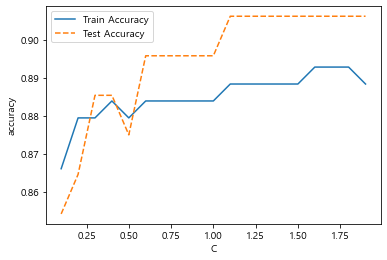

In [29]:
train_accuracy = []; test_accuracy = []
para_c = [0.1*c for c in range(1,20)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['C'] = para_c
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy

df_accuracy_c.round(3)
plt.plot(para_c, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_c, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('C')
plt.legend()

kernel 최적화를 도와주는 파라미터인 gamma의 경우,  
range를 (0~10)으로 했을 때 값의 크기에 따른 정확도 변화가 없다.

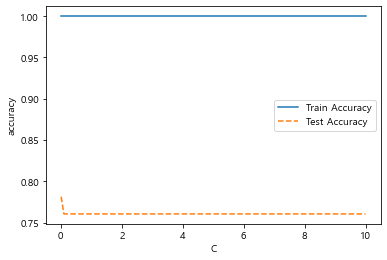

In [30]:
train_accuracy = []; test_accuracy = []
para_gamma = [10**gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 1,random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma['C'] = para_gamma
df_accuracy_gamma['TrainAccuracy'] = train_accuracy
df_accuracy_gamma['TestAccuracy'] = test_accuracy

df_accuracy_gamma.round(3)
plt.plot(para_gamma, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_gamma, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('C')
plt.legend()

range를 (0.1 ~ 2)로 설정해도 성능 변화가 일어나지 않았다.

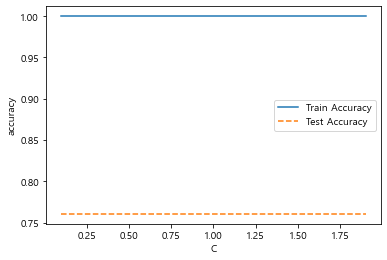

In [31]:
train_accuracy = []; test_accuracy = []
para_gamma = [0.1*gamma for gamma in range(1,20)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 1,random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma['C'] = para_gamma
df_accuracy_gamma['TrainAccuracy'] = train_accuracy
df_accuracy_gamma['TestAccuracy'] = test_accuracy

df_accuracy_gamma.round(3)
plt.plot(para_gamma, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_gamma, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('C')
plt.legend()

서포트 벡터 머신 모델의 경우 scale에 영향을 많이 받는 모델이므로,  
scale 조절 후 SVC 모델을 재구성하였다.

In [32]:
v_feature_name = df_train_x.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


scale 조정 후, SVC 기본 모델의 성능은 train 99%, test 96%로 높은 성능을 나타냈다.

In [33]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)

svm_scaled = SVC(random_state=1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)
print(svm_scaled.score(df_scaled_train_x, df_train_y))
print(svm_scaled.score(df_scaled_test_x, df_test_y))

0.9910714285714286
0.9583333333333334


scale 조정 모델의 경우, C가 1일 때 정확도가 많이 증가하였다.  
따라서, 하이퍼 파라미터 C 값을 1로 설정하였다.

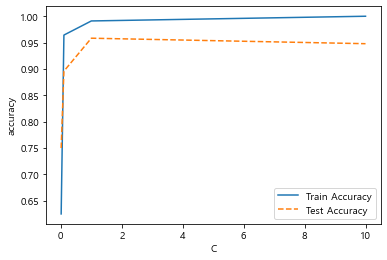

In [36]:
train_accuracy = []; test_accuracy = []
para_c = [10**c for c in range(-2,2)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['C'] = para_c
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy

df_accuracy_c.round(3)
plt.plot(para_c, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_c, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('C')
plt.legend()

gamma의 경우, 값이 늘어나면서 과대적합이 일어나므로  
소수점 구간에서 가장 작은 값인 0.1로 설정하였다.

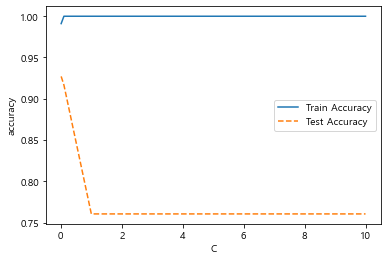

In [38]:
train_accuracy = []; test_accuracy = []
para_gamma = [10**gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 1,random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma['C'] = para_gamma
df_accuracy_gamma['TrainAccuracy'] = train_accuracy
df_accuracy_gamma['TestAccuracy'] = test_accuracy

df_accuracy_gamma.round(3)
plt.plot(para_gamma, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_gamma, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('C')
plt.legend()

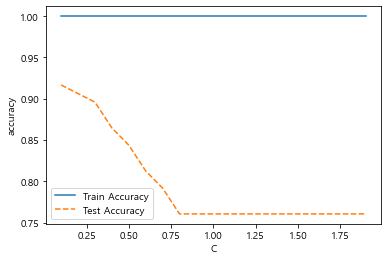

In [43]:
train_accuracy = []; test_accuracy = []
para_gamma = [0.1*gamma for gamma in range(1,20)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 1,random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma['C'] = para_gamma
df_accuracy_gamma['TrainAccuracy'] = train_accuracy
df_accuracy_gamma['TestAccuracy'] = test_accuracy

df_accuracy_gamma.round(3)
plt.plot(para_gamma, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_gamma, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('C')
plt.legend()

최종 SVC 모델은 다음과 같이 나타났다.  
train 100%, test 91%의 정확도를 보였으며, 과대적합되었다고 할 수 있다.  
또한, 양성의 정밀도와 재현도, f1-score가 음성에 비해 낮은 편인데,  
모델 개선이 필요하다고 볼 수 있다. 

In [59]:
svc_final = SVC(gamma = 0.1, C = 1, random_state = 1234)
svc_final.fit(df_scaled_train_x, df_train_y)
y_pred = svc_final.predict(df_scaled_test_x)

print('Accuracy on training set : {}'.format(svc_final.score(df_scaled_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(svc_final.score(df_scaled_test_x, df_test_y)))

print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set : 1.0
Accuracy on test set : 0.917
              precision    recall  f1-score   support

          양성      0.833     0.833     0.833        24
          음성      0.944     0.944     0.944        72

    accuracy                          0.917        96
   macro avg      0.889     0.889     0.889        96
weighted avg      0.917     0.917     0.917        96

